<a href="https://colab.research.google.com/github/AbiramiMuthu/TensorFlow-TimeSeries-LSTM-Air_Passenger_Prediction/blob/main/TF_Time_Series_LSTM_Air_Passenger_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load libraries

In [166]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [167]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM


## Mount the Drive

In [168]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read the Dataset 

#### Dataset is avilable in Kaggle

In [169]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Air Passenger Prediction/AirPassengers.csv")
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Totally there are 144 months, we are going to use 100 for training and 44 for testing

In [170]:
df.shape

(144, 2)

In [171]:
df=df.drop(["Month"],axis=1)

In [172]:
df.head(5)

,#Passengers
0,112
1,118
2,132
3,129
4,121


## Data Normalisation

In [173]:
scaler=MinMaxScaler()
dataset=scaler.fit_transform(df)


In [174]:
dataset.shape

(144, 1)

In [175]:
type(dataset)

numpy.ndarray

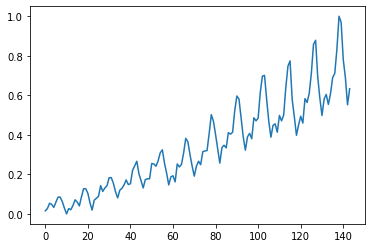

In [176]:
plt.plot(dataset)

In [177]:
train_size=100

In [178]:
train_data=dataset[0:train_size,:]
test_data=dataset[train_size:,:]

In [179]:
train_data.shape

(100, 1)

In [180]:
test_data.shape

(44, 1)

In [181]:
train_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

#### We need to find the value of the month using the previous month value. 2017 FEb value will be predicted using 2017 Jan. so our xtrain value will be jan 2017 and ytrain value will be Feb 2017. so here lookback is set to 1

Convert the X_train,Y_train,X_test,Y_test in this format using the below function

In [182]:
def get_data_in_batch(dataset,lookback):
  data_X=[]
  data_Y=[]
  for i in range(len(dataset)-1-lookback):
    data_X.append(dataset[i:i+lookback,0])
    data_Y.append(dataset[i+lookback,0])
  return np.array(data_X),np.array(data_Y)

In [183]:
lookback=1
X_train,Y_train=get_data_in_batch(train_data,lookback)
print(X_train.shape,Y_train.shape)

(98, 1) (98,)


In [184]:
X_test,Y_test=get_data_in_batch(test_data,lookback)
print(X_test.shape,Y_test.shape)

(42, 1) (42,)


##### All the 4 training and testing values are 2 dimensional. we need to reshape to three dimensional before passing it through the NN

In [185]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [186]:
print(X_train.shape)

(98, 1, 1)


## Build the LSTM Model

In [187]:
model=Sequential()
model.add(LSTM(units=5,input_shape=X_train[0].shape))
model.add(Dense(1))



In [188]:
model.compile(optimizer='adam',loss="mean_squared_error")

In [189]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [190]:
model.fit(X_train,Y_train,epochs=50,batch_size=1)

Epoch 1/50
98/98 [==============================] - 1s 2ms/step - loss: 0.0530
Epoch 2/50
98/98 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 3/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 4/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 5/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 6/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 7/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 8/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 9/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 10/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 11/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 12/50
98/98 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 13/50
98/98 [==============================

## Prediction

In [191]:
y_pred=model.predict(X_test)

Convert back to the original form before comparison

In [192]:
y_pred=scaler.inverse_transform(y_pred)


In [193]:
y_pred

array([[351.0374 ],
       [410.5604 ],
       [445.72345],
       [447.29587],
       [395.10022],
       [343.60107],
       [303.69882],
       [333.2813 ],
       [337.0461 ],
       [316.1841 ],
       [357.49316],
       [344.53387],
       [358.4114 ],
       [421.46005],
       [465.71674],
       [476.07816],
       [395.10022],
       [354.7324 ],
       [308.51288],
       [334.2238 ],
       [355.6537 ],
       [338.92334],
       [396.8386 ],
       [388.09683],
       [408.8635 ],
       [451.20187],
       [506.1351 ],
       [513.4009 ],
       [444.14532],
       [397.70587],
       [357.49316],
       [395.97   ],
       [406.3082 ],
       [383.6798 ],
       [408.01303],
       [442.56152],
       [451.20187],
       [497.3276 ],
       [551.82367],
       [542.56647],
       [478.26154],
       [442.56152]], dtype=float32)

In [194]:
scaler.scale_

array([0.0019305])

In [195]:
Y_test.shape

(42,)

Y_test is a 1D array, Minmax scaler need a 2D array as input so first reshape the Y_test and then transform back to the original value

In [196]:
Y_test=Y_test.reshape(-1,1)

In [197]:
Y_test.shape

(42, 1)

In [198]:
Y_test=scaler.inverse_transform(Y_test)

In [199]:
Y_test

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.]])

## Plotting the True and the Predicted value

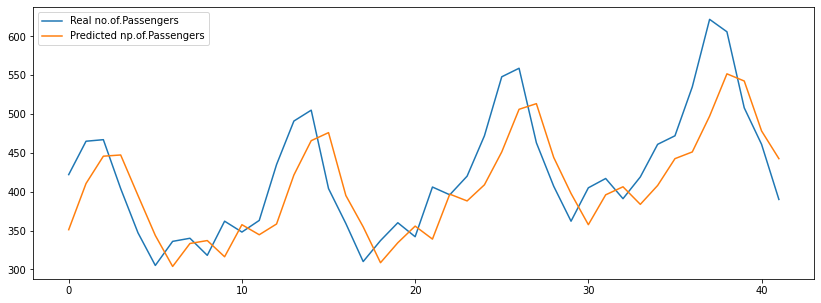

In [200]:
plt.figure(figsize=(14,5))
plt.plot(Y_test,label="Real no.of.Passengers")
plt.plot(y_pred,label="Predicted np.of.Passengers")
plt.legend()
plt.show()